In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
url ="https://raw.githubusercontent.com/heta-shah/Google-Apps-Analysis/master/googleplaystore.csv"
data= pd.read_csv(url)
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
data.shape

(10841, 13)

In [ ]:
data.isnull()

In [ ]:
data.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000157645ADEF0>]],
      dtype=object)

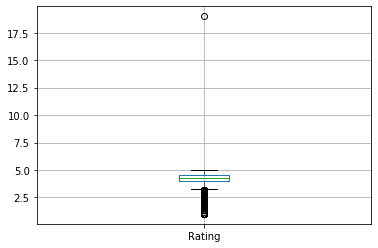

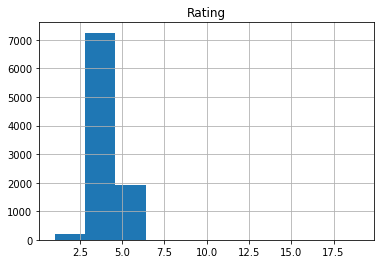

In [10]:
data.boxplot()# outlier seen here one somewhere near 19 so remove that because rating cannot be more than 5 on app store
data.hist()

In [5]:
data.info()
#It is clear that there are some missing values so next we will clean the data and remove allthwe missing values.
# total there are 10840(counting from 0) rows so 10841(counting from 1) so here we can see that Rating,Current version and Android Version has more empty values and so we need to clean them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# DATA CLEANING

In [6]:
# getting the total number of null values (sum of nulls) 
data.isnull().sum()
# It can be seen that Rating has the highest number of null data and so we need to handle that.

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
data[data.Rating >5]
# as we can see that the rating is 19 which is greater than 5 and which is also a false value so we cannot subsitute also so we drop this row because it is not null or empty but because it has false value.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
data.drop([10472],inplace=True)


In [9]:
data.shape

(10840, 13)

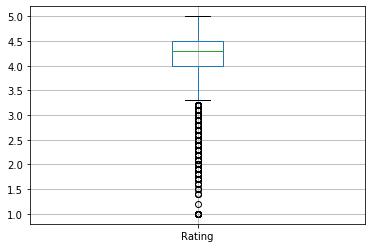

In [10]:
data.boxplot()
# The data is now in range i.e from 1-5. It can be seen that there is some data in between 1 - 3.5, but most of it is gathered in between 4.0 - 4.5.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002800917C668>]],
      dtype=object)

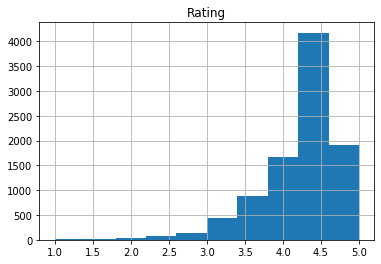

In [11]:
data.hist()
#data is right skewed so we use median insted of mean 

In [12]:
# for catergorical values we will use mode to fill in the values but for numerical columns we will use median.
def impute_median(series):
    return series.fillna(series.median())

In [13]:
data.Rating = data['Rating'].transform(impute_median)

In [14]:
data.isnull().sum() 
# So now there are no null values in Rating column. All the empty values have been filled by the median values.

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [15]:
# Now we have Type , Current Ver, Android Ver in empty values list. So we will remove the null values from them.(catregorical columns)
# We will fill this values with modes so we will check the mode values for each column:
print(data['Type'].mode())
print(data['Current Ver'].mode())
print(data['Android Ver'].mode())

# We did this to check if any col has bimodal value but luckily no col has bimodal value.So we are good to go and we will now fill this values into the columns.

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [16]:
#Replacing all the null values with modal values.
# here value[0] means that we are choosing te first value this was a bimodal case so [0] is the first value. 

data['Type'].fillna(str(data['Type'].mode().values[0]), inplace = True)
data['Current Ver'].fillna(str(data['Current Ver'].mode().values[0]), inplace = True)
data['Android Ver'].fillna(str(data['Android Ver'].mode().values[0]), inplace = True)

In [17]:
data.isnull().sum()
# Now all the rows have 0 null values and we can now process with the data

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [18]:
# Now once all the columns are clean we have to transform the column data because all the coulmns except Rating are in object type so we will comvert some of them into numerical.  

dataType = data.dtypes
print('Data type of each column of Dataframe :')
print(dataType)

Data type of each column of Dataframe :
App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [19]:
#performing this step to clean the column by removing the $ in the column and then converting it into numeric form.
data['Price']= data['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
data['Price'] = data['Price'].apply(lambda x: float(x))


In [20]:
# Convering into numeric data type
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

In [21]:
#performing this step to clean the column by removing the + and , in the column and then converting it into numeric form.
data['Installs']= data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
data['Installs']= data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
data['Installs'] = data['Installs'].apply(lambda x: float(x))


In [ ]:
data.head(10)
dataType = data.dtypes
print('Data type of each column of Dataframe :')
print(dataType)
# As seen the data type has changed so the columns have been transformed to numerical data type

In [22]:
data.describe()
# Earlier it was only rating column here now all the other transformed columns have been displayed 

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [23]:
grp = data.groupby('Category')
x= grp['Rating'].agg(np.mean)
y= grp['Reviews'].agg(np.mean)
z= grp['Price'].agg(np.sum)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

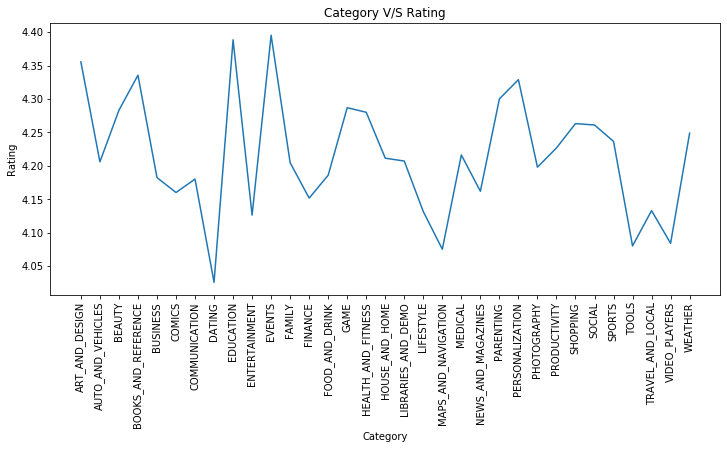

In [38]:
plt.figure(figsize=(12,5))
plt.plot(x,'-')
plt.xticks(rotation = 90)
plt.title("Category V/S Rating")
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

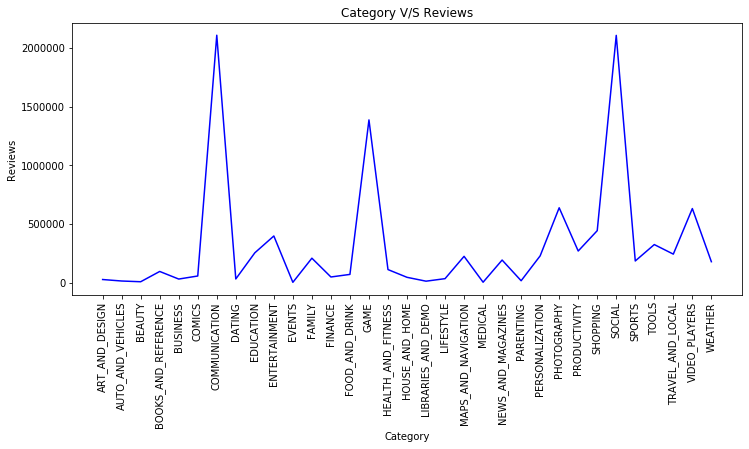

In [44]:
plt.figure(figsize=(12,5))
plt.plot(y,'b')
plt.xticks(rotation = 90)
plt.title("Category V/S Reviews")
plt.xlabel('Category')
plt.ylabel('Reviews')
plt.show()

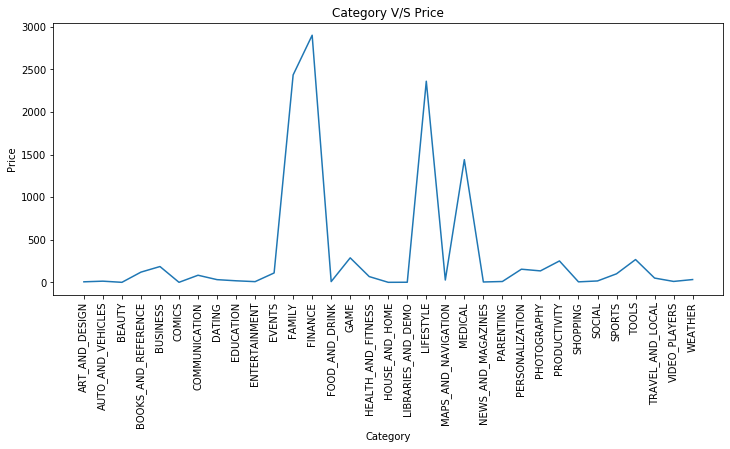

In [36]:
plt.figure(figsize=(12,5))
plt.plot(z,'-')
plt.xticks(rotation = 90)
plt.title("Category V/S Price")
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()